# **House Market**
Allons un peu plus loin dans python

    1. Téléchargez les trois fichiers “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv”

    2. Importez les trois datasets

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
superficie = pd.read_csv('superficie.csv', header = None, index_col = 0)
sdb = pd.read_csv('nombre_de_sdb.csv', header = None, index_col = 0)
room = pd.read_csv('nombre_de_chambres.csv', header = None, index_col = 0)
price = pd.read_csv('house_price.csv', header = 0, index_col = 0)

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0
...,...,...
95,15,157223.0
96,81,1616313.0
97,42,143573.0
98,19,974546.0


    1. Donnez un nom de colonne à ces trois datasets

In [174]:
superficie.rename(columns = {0:'id', 1:'superficie'}, inplace = True)
sdb.rename(columns = {0:'id', 1:'nombre_de_sdb'}, inplace = True)
room.rename(columns = {0:'id', 1:'nombre_de_chambres'}, inplace = True)
price = price.reset_index().set_index('id')
price = price.sort_index()

,house_price
id,
0,1421908.0
1,1305091.0
2,164373.0
3,1441714.0
4,108290.0
5,1703033.0
6,340284.0
7,1236645.0
8,257405.0


    1. Fusionner ces quatre datasets un seul dataframe (on fera une fusion simplement par index) qu’on nommera dataset

In [175]:
dataset = pd.concat([superficie, sdb, room, price],join = 'inner', axis = 1)

    1. Quelle est la superficie moyenne des maisons de notre dataset ?

In [59]:
dataset.superficie.mean()

20439.77

    1. Quelle est le nombre de chambre médian et moyen ?

In [60]:
dataset.nombre_de_chambres.mean()
dataset.nombre_de_chambres.median()

2.0

    1. Quel est le coût moyen d’une maison ?

In [81]:
dataset.house_price.mean()

767747.87

    1. Quel est le coût moyen par chambre ?

In [176]:
chb = dataset.groupby(['nombre_de_chambres']).mean()
chb

,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,
1,22798.695652,1.869565,980774.869565
2,19001.483871,2.000000,642086.258065
3,19538.037037,2.037037,645904.592593
4,21212.315789,1.894737,888045.631579


    1. Le coût moyen par chambre ne nous apprend pas grand chose.Tentons de faire des catégories de superficie

    Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison Créez trois catégories qui respectivement correspondront à :

        “très grande” == “une maison dont la taille est supérieure à 25 000 sqrt_feet”

        “grande” == “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”

        “moyenne” == “une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”

        "petite" == "une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet”

        "très petite" == une maison dont la taille est inférieure à 10 000 sqrt_feet”

Remplissez les lignes correspondantes dans la colonne taille_maison

In [189]:
dataset['taille_maison'] = 0
dataset['taille_maison'].loc[dataset.superficie > 25000] = '5 trés grande'
dataset['taille_maison'].loc[(dataset.superficie <= 25000) & (dataset.superficie > 20000)] = '4 grande'
dataset['taille_maison'].loc[(dataset.superficie <= 20000) & (dataset.superficie > 15000)] = '3 moyenne'
dataset['taille_maison'].loc[(dataset.superficie <= 15000) & (dataset.superficie >= 10000)] = '2 petite'
dataset['taille_maison'].loc[dataset.superficie < 10000] = '1 trés petite'

C:\Users\XPS\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


    1. Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?

In [190]:
round(dataset.groupby(['taille_maison']).agg({'superficie': "count", 'house_price': "mean"}).sort_values(by = 'house_price'),2)

,superficie,house_price
taille_maison,,
2 petite,26,156138.69
3 moyenne,19,325694.79
4 grande,23,732538.52
5 trés grande,32,1552456.06


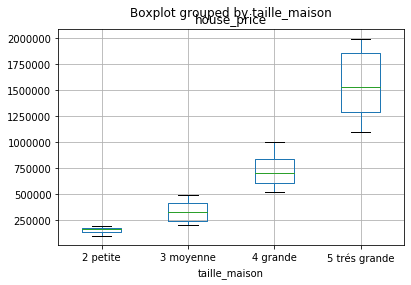

In [191]:
dataset.sort_values(by = 'superficie')
dataset.boxplot(column=["house_price"], by="taille_maison")
plt.show()

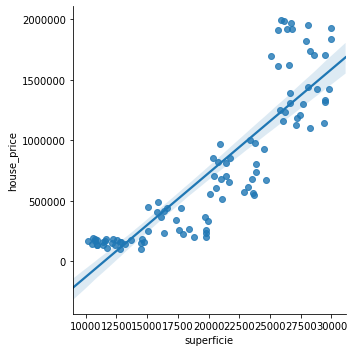

In [183]:
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price", data = dataset)